In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
df = pd.read_csv('/content/Risk of Developing or Dying From Cancer.csv') #leitura do arquivo

In [5]:
df

,Cancer Type,Male Risk Development Percentage,Male Risk Development Ratio(One in ____ Person),Male Risk Dying Percentage,Male Risk Dying Ratio(One in ____ Person),Female Risk Development Percentage,Female Risk Development Ratio(One in ____ Person),Female Risk Dying Percentage,Female Risk Dying Ratio(One in ____ Person)
0,Any cancer,41.6,2,19.0,5,39.6,3,17.0,6
1,Bladder,3.6,28,0.8,119,1.1,89,0.3,311
2,Brain and nervous system,0.7,145,0.5,192,0.5,186,0.4,243
3,Breast,0.1,726,0.1,3476,13.0,8,2.5,41
4,Colon and rectum,4.3,23,1.6,61,3.9,25,1.5,67
5,Esophagus,0.8,127,0.7,144,0.2,434,0.2,536
6,Hodgkin lymphoma,0.2,431,0.1,2956,0.2,527,0.1,4071
7,Kidney and renal pelvis,2.3,43,0.5,183,1.4,73,0.3,330
8,Larynx (voice box),0.5,197,0.2,594,0.1,844,0.1,2416
9,Leukemia,1.9,53,0.9,115,1.3,75,0.6,159


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 9 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Cancer Type                                        24 non-null     object 
 1   Male Risk Development Percentage                   24 non-null     float64
 2   Male Risk Development Ratio(One in ____ Person)    24 non-null     int64  
 3   Male Risk Dying Percentage                         24 non-null     float64
 4   Male Risk Dying Ratio(One in ____ Person)          24 non-null     int64  
 5   Female Risk Development Percentage                 24 non-null     float64
 6   Female Risk Development Ratio(One in ____ Person)  24 non-null     int64  
 7   Female Risk Dying Percentage                       24 non-null     float64
 8   Female Risk Dying Ratio(One in ____ Person)        24 non-null     int64  
dtypes: float64(4)

In [ ]:
df.head()

,Cancer Type,Male Risk Development Percentage,Male Risk Development Ratio(One in ____ Person),Male Risk Dying Percentage,Male Risk Dying Ratio(One in ____ Person),Female Risk Development Percentage,Female Risk Development Ratio(One in ____ Person),Female Risk Dying Percentage,Female Risk Dying Ratio(One in ____ Person)
0,Any cancer,41.6,2,19.0,5,39.6,3,17.0,6
1,Bladder,3.6,28,0.8,119,1.1,89,0.3,311
2,Brain and nervous system,0.7,145,0.5,192,0.5,186,0.4,243
3,Breast,0.1,726,0.1,3476,13.0,8,2.5,41
4,Colon and rectum,4.3,23,1.6,61,3.9,25,1.5,67


In [ ]:
df.columns

Index(['Cancer Type', 'Male Risk Development Percentage',
       'Male Risk Development Ratio(One in ____ Person)',
       'Male Risk Dying Percentage',
       'Male Risk Dying Ratio(One in ____ Person)',
       'Female Risk Development Percentage',
       'Female Risk Development Ratio(One in ____ Person)',
       'Female Risk Dying Percentage',
       'Female Risk Dying Ratio(One in ____ Person)'],
      dtype='object')

In [ ]:
df.describe()

,Male Risk Development Percentage,Male Risk Development Ratio(One in ____ Person),Male Risk Dying Percentage,Male Risk Dying Ratio(One in ____ Person),Female Risk Development Percentage,Female Risk Development Ratio(One in ____ Person),Female Risk Dying Percentage,Female Risk Dying Ratio(One in ____ Person)
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,3.716667,110.500000,1.500000,661.625000,3.445833,138.791667,1.337500,522.083333
std,8.537165,164.107865,3.849449,1287.755304,8.172966,197.216054,3.448858,924.848562
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.475000,21.250000,0.100000,56.750000,0.575000,30.250000,0.200000,72.250000
50%,1.250000,55.500000,0.450000,140.000000,1.100000,74.000000,0.350000,212.500000
75%,2.700000,131.500000,0.925000,251.000000,2.050000,145.250000,0.725000,473.000000
max,41.600000,726.000000,19.000000,4889.000000,39.600000,844.000000,17.000000,4071.000000


In [ ]:
df.shape

(24, 9)

# Quais são os tipos de câncer mais comuns em termos de risco de desenvolvimento para homens e mulheres?

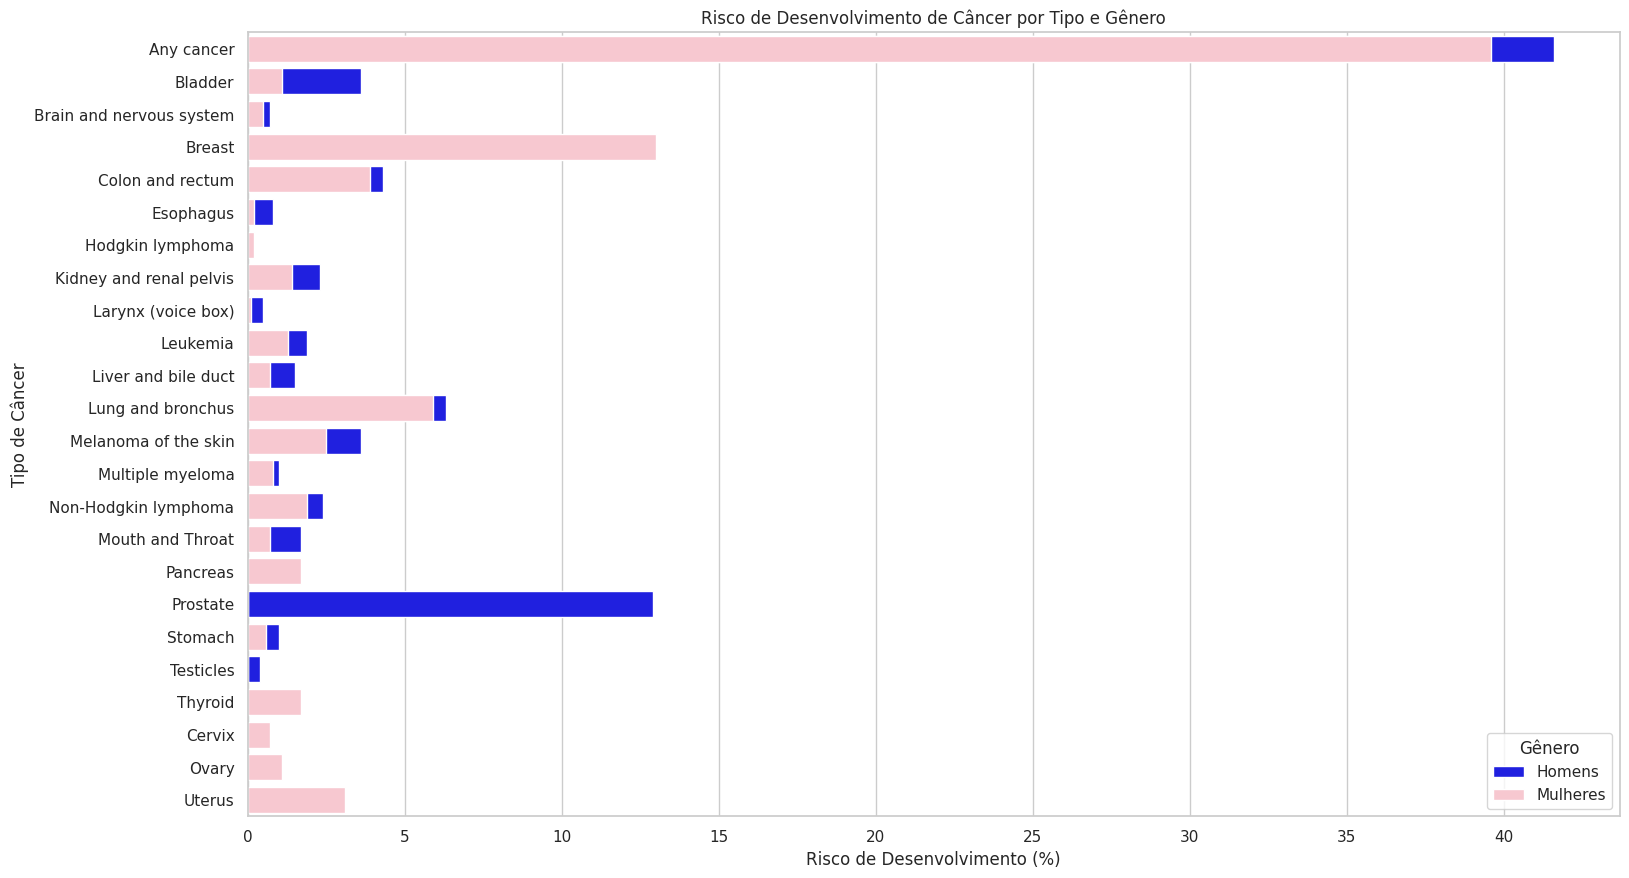

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

# Plotando o gráfico para os homens
sns.barplot(x="Male Risk Development Percentage", y="Cancer Type", data=df, color="blue", label="Homens")

# Plotando o gráfico para as mulheres
sns.barplot(x="Female Risk Development Percentage", y="Cancer Type", data=df, color="pink", label="Mulheres")

# Adicionando título e rótulos
plt.title("Risco de Desenvolvimento de Câncer por Tipo e Gênero")
plt.xlabel("Risco de Desenvolvimento (%)")
plt.ylabel("Tipo de Câncer")

# Adicionando legenda
plt.legend(title="Gênero")

# Exibindo o gráfico
plt.show()

# Quais tipos de câncer apresentam maior risco de morte para homens e mulheres?

In [6]:
# Encontrar o tipo de câncer com maior risco de morte para homens
highest_male_risk = df.loc[df['Male Risk Dying Percentage'].idxmax()]

# Encontrar o tipo de câncer com maior risco de morte para mulheres
highest_female_risk = df.loc[df['Female Risk Dying Percentage'].idxmax()]

print("Maior risco de morte para homens:")
print(highest_male_risk[['Cancer Type', 'Male Risk Dying Percentage']])

print("\nMaior risco de morte para mulheres:")
print(highest_female_risk[['Cancer Type', 'Female Risk Dying Percentage']])

Maior risco de morte para homens:
Cancer Type                   Any cancer
Male Risk Dying Percentage          19.0
Name: 0, dtype: object

Maior risco de morte para mulheres:
Cancer Type                     Any cancer
Female Risk Dying Percentage          17.0
Name: 0, dtype: object


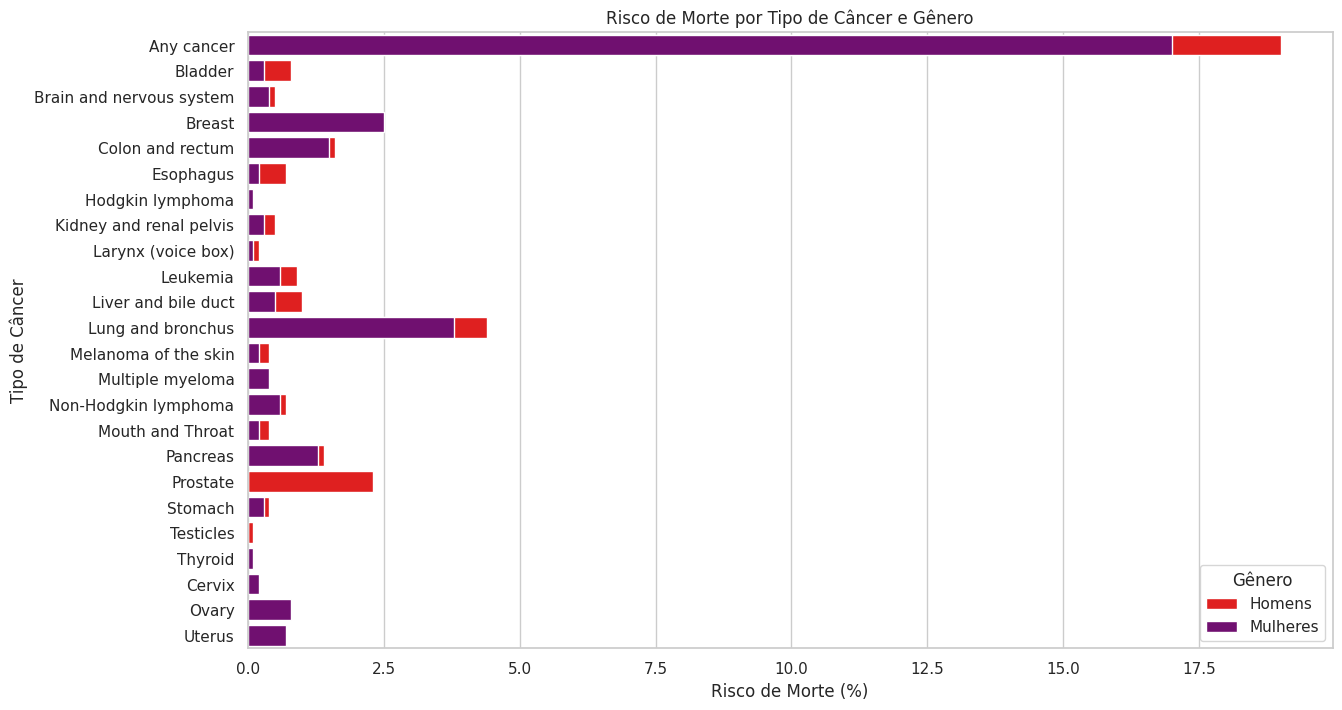

In [7]:
# Configuração do estilo do seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

# Plotando o gráfico para o risco de morte dos homens
sns.barplot(x="Male Risk Dying Percentage", y="Cancer Type", data=df, color="red", label="Homens")

# Plotando o gráfico para o risco de morte das mulheres
sns.barplot(x="Female Risk Dying Percentage", y="Cancer Type", data=df, color="purple", label="Mulheres")

# Adicionando título e rótulos
plt.title("Risco de Morte por Tipo de Câncer e Gênero")
plt.xlabel("Risco de Morte (%)")
plt.ylabel("Tipo de Câncer")

# Adicionando legenda
plt.legend(title="Gênero")

# Exibindo o gráfico
plt.show()

# Existe alguma correlação entre o risco de desenvolver câncer e o risco de morrer dele, tanto para homens quanto para mulheres?

In [8]:
# Correlação para homens
correlation_male = df[['Male Risk Development Percentage', 'Male Risk Dying Percentage']].corr()

# Correlação para mulheres
correlation_female = df[['Female Risk Development Percentage', 'Female Risk Dying Percentage']].corr()

print("Correlação entre risco de desenvolvimento e risco de morte para homens:")
print(correlation_male)

print("\nCorrelação entre risco de desenvolvimento e risco de morte para mulheres:")
print(correlation_female)

Correlação entre risco de desenvolvimento e risco de morte para homens:
                                  Male Risk Development Percentage  \
Male Risk Development Percentage                          1.000000   
Male Risk Dying Percentage                                0.974046   

                                  Male Risk Dying Percentage  
Male Risk Development Percentage                    0.974046  
Male Risk Dying Percentage                          1.000000  

Correlação entre risco de desenvolvimento e risco de morte para mulheres:
                                    Female Risk Development Percentage  \
Female Risk Development Percentage                            1.000000   
Female Risk Dying Percentage                                  0.976938   

                                    Female Risk Dying Percentage  
Female Risk Development Percentage                      0.976938  
Female Risk Dying Percentage                            1.000000  


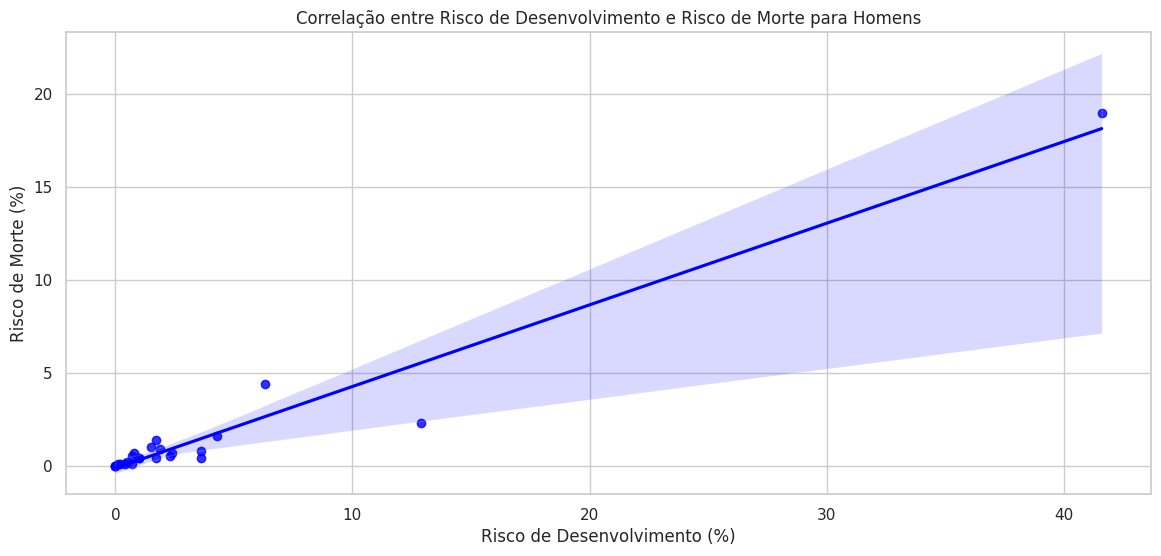

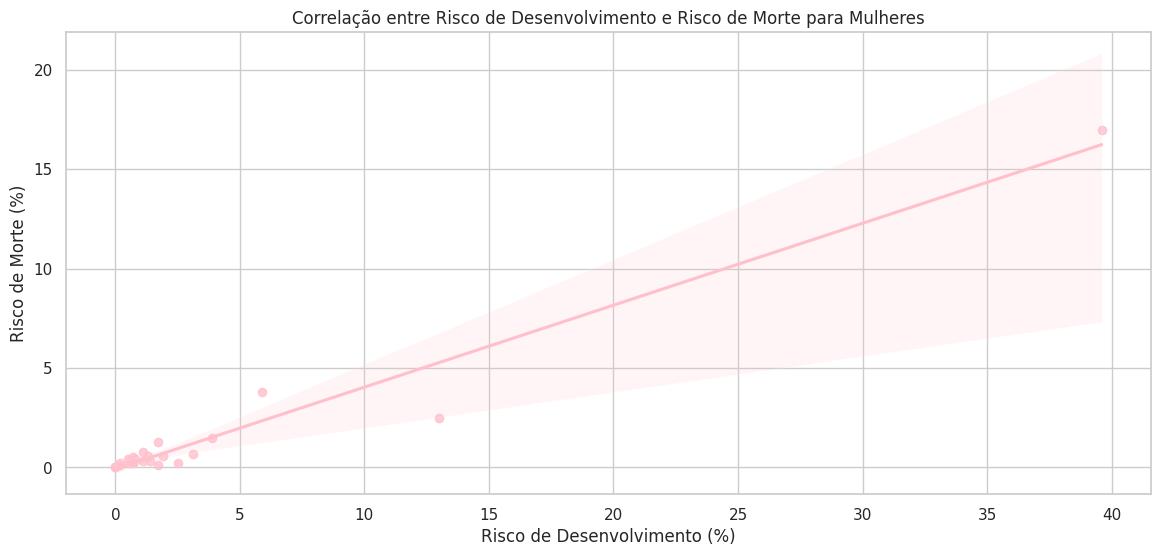

In [9]:
plt.figure(figsize=(14, 6))
sns.regplot(x='Male Risk Development Percentage', y='Male Risk Dying Percentage', data=df, color='blue')
plt.title('Correlação entre Risco de Desenvolvimento e Risco de Morte para Homens')
plt.xlabel('Risco de Desenvolvimento (%)')
plt.ylabel('Risco de Morte (%)')
plt.show()

# Gráfico de dispersão para mulheres
plt.figure(figsize=(14, 6))
sns.regplot(x='Female Risk Development Percentage', y='Female Risk Dying Percentage', data=df, color='pink')
plt.title('Correlação entre Risco de Desenvolvimento e Risco de Morte para Mulheres')
plt.xlabel('Risco de Desenvolvimento (%)')
plt.ylabel('Risco de Morte (%)')
plt.show()

# Machine Learning

In [10]:
# Definir funções para categorizar risco de desenvolvimento e de morte
def categorize_risk(risk):
    if risk < 10:
        return 'baixo risco'
    elif 10 <= risk < 20:
        return 'médio risco'
    else:
        return 'alto risco'

# Aplicar as funções às colunas correspondentes
df['Male Development Risk Category'] = df['Male Risk Development Percentage'].apply(categorize_risk)
df['Male Dying Risk Category'] = df['Male Risk Dying Percentage'].apply(categorize_risk)
df['Female Development Risk Category'] = df['Female Risk Development Percentage'].apply(categorize_risk)
df['Female Dying Risk Category'] = df['Female Risk Dying Percentage'].apply(categorize_risk)

# Visualizar as primeiras linhas para verificar as novas categorias
print(df[['Cancer Type', 'Male Development Risk Category', 'Male Dying Risk Category',
          'Female Development Risk Category', 'Female Dying Risk Category']].head())


                Cancer Type Male Development Risk Category  \
0                Any cancer                     alto risco   
1                   Bladder                    baixo risco   
2  Brain and nervous system                    baixo risco   
3                    Breast                    baixo risco   
4          Colon and rectum                    baixo risco   

  Male Dying Risk Category Female Development Risk Category  \
0              médio risco                       alto risco   
1              baixo risco                      baixo risco   
2              baixo risco                      baixo risco   
3              baixo risco                      médio risco   
4              baixo risco                      baixo risco   

  Female Dying Risk Category  
0                médio risco  
1                baixo risco  
2                baixo risco  
3                baixo risco  
4                baixo risco  


In [11]:
# Selecionar features e target
features = df[['Male Risk Development Percentage', 'Male Risk Dying Percentage',
               'Female Risk Development Percentage', 'Female Risk Dying Percentage']]
target = df['Male Dying Risk Category']  # Exemplo usando categoria de risco de morte dos homens


In [12]:

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [14]:
# Instanciar o modelo de Árvore de Decisão
dtc = DecisionTreeClassifier(random_state=42)

# Treinar o modelo
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [15]:
# Instanciar o modelo de Random Forest
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinar o modelo
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
# Previsões no conjunto de teste
y_pred_dtc = dtc.predict(X_test)

# Acurácia
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
print(f"Acurácia do modelo de Árvore de Decisão: {accuracy_dtc:.2f}")

# Matriz de Confusão
confusion_dtc = confusion_matrix(y_test, y_pred_dtc)
print("Matriz de Confusão (Árvore de Decisão):")
print(confusion_dtc)

# Relatório de Classificação
report_dtc = classification_report(y_test, y_pred_dtc)
print("Relatório de Classificação (Árvore de Decisão):")
print(report_dtc)

Acurácia do modelo de Árvore de Decisão: 0.80
Matriz de Confusão (Árvore de Decisão):
[[4 0]
 [1 0]]
Relatório de Classificação (Árvore de Decisão):
              precision    recall  f1-score   support

 baixo risco       0.80      1.00      0.89         4
 médio risco       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
y_pred_rfc = rfc.predict(X_test)

# Acurácia
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print(f"Acurácia do modelo de Random Forest: {accuracy_rfc:.2f}")

# Matriz de Confusão
confusion_rfc = confusion_matrix(y_test, y_pred_rfc)
print("Matriz de Confusão (Random Forest):")
print(confusion_rfc)

# Relatório de Classificação
report_rfc = classification_report(y_test, y_pred_rfc)
print("Relatório de Classificação (Random Forest):")
print(report_rfc)

Acurácia do modelo de Random Forest: 0.80
Matriz de Confusão (Random Forest):
[[4 0]
 [1 0]]
Relatório de Classificação (Random Forest):
              precision    recall  f1-score   support

 baixo risco       0.80      1.00      0.89         4
 médio risco       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
